## QUESTION 1

In [1]:
from sympy import symbols, expand

# Define the symbols
P = symbols('P')

# Given equations
D = 2600 - 3 * P
C = 4200 + 6 * D

# Calculate Revenue
Revenue = P * D

# Calculate Total Profit (TP = Revenue - Cost)
TP = Revenue - C

# Simplify the expression for TP
TP_simplified = expand(TP)
TP_simplified


-3*P**2 + 2618*P - 19800

## QUESTION 2

PART A

V = (R*F*M)/D


PART B


In [3]:
# Function to calculate the gross profit during a customer's lifetime (economic value of a customer)
def customer_lifetime_value(R, F, M, D):
    """
    Calculate the gross profit during a customer's lifetime (economic value of a customer).
    
    Parameters:
    R (float): Average revenue per visit.
    F (float): Frequency of visits per year.
    M (float): Gross profit margin (as a fraction).
    D (float): Fraction of customers defecting each year.
    
    Returns:
    float: The economic value of a customer.
    """
    if D <= 0 or D >= 1:
        raise ValueError("Defection rate D should be between 0 and 1.")
    
    # Calculate the gross profit during the customer's lifetime
    V = (R * F * M) / D
    return V

# Given values for part b
R = 60    # average revenue per visit
F = 7   # visits per year
M = 0.4  # gross profit margin (40%)
D = 0.5   # fraction of customers defecting each year (50%)

# Calculate the economic value of the customer and round to the nearest dollar
customer_value_part_b = round(customer_lifetime_value(R, F, M, D))
customer_value_part_b


336

## QUESTION 3

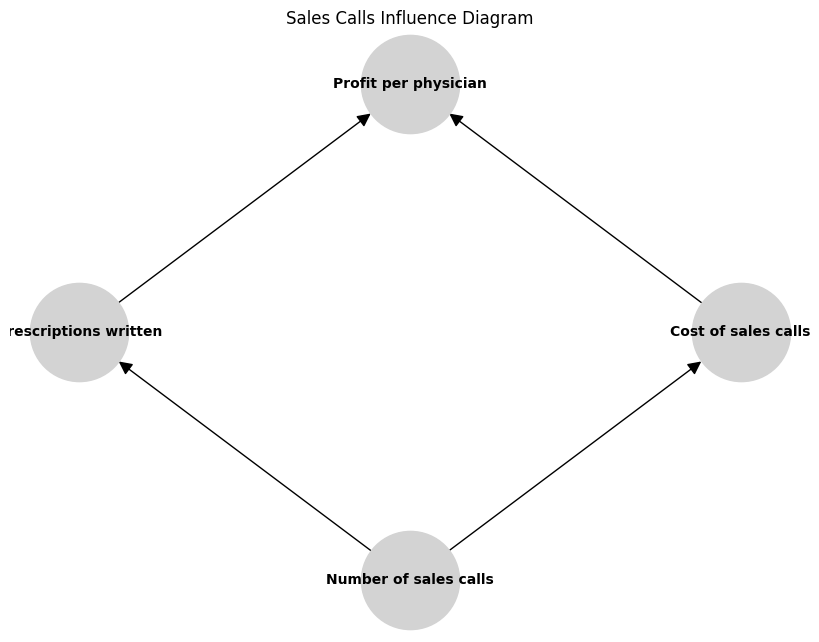

In [5]:
import matplotlib.pyplot as plt
import networkx as nx

# Create a directed graph
G = nx.DiGraph()

# Add nodes
nodes = ["Number of sales calls", "Prescriptions written", "Cost of sales calls", "Profit per physician"]
G.add_nodes_from(nodes)

# Add edges based on the relationships in the diagram
edges = [("Number of sales calls", "Prescriptions written"),
         ("Number of sales calls", "Cost of sales calls"),
         ("Prescriptions written", "Profit per physician"),
         ("Cost of sales calls", "Profit per physician")]

G.add_edges_from(edges)

# Define positions for nodes to resemble the diagram layout
pos = {
    "Number of sales calls": (0, 0),
    "Prescriptions written": (-1, 1),
    "Cost of sales calls": (1, 1),
    "Profit per physician": (0, 2)
}

# Draw the nodes and edges
plt.figure(figsize=(8, 6))
nx.draw(G, pos, with_labels=True, node_size=5000, node_color="lightgray", font_size=10, font_weight="bold", arrowsize=20)
plt.title("Sales Calls Influence Diagram")
plt.show()


## QUESTION 4

PART 1

= -3.0156 * A2^2 + 3317.5 * A2


PART B

In [4]:
# Define the function to calculate revenue based on the price
def calculate_revenue(price):
    # Revenue model
    return -2.8931 * price**2 + 3239.5 * price

# Price values as given in the problem
prices = [500, 510, 520, 530, 540,550,560,570,580,590,600]

# Calculate total revenue for each price and round to the nearest cent
revenues = [round(calculate_revenue(price), 2) for price in prices]

# Prepare the output as a list of tuples for display
revenue_results = list(zip(prices, revenues))
revenue_results


[(500, 896475.0),
 (510, 899649.69),
 (520, 902245.76),
 (530, 904263.21),
 (540, 905702.04),
 (550, 906562.25),
 (560, 906843.84),
 (570, 906546.81),
 (580, 905671.16),
 (590, 904216.89),
 (600, 902184.0)]

In [5]:
# Define a function to find the price that results in maximum revenue within a given range of prices
def find_max_revenue_price(prices):
    # Calculate revenues for each price
    revenues = [calculate_revenue(price) for price in prices]
    # Find the index of the maximum revenue
    max_index = revenues.index(max(revenues))
    # Return the price corresponding to the maximum revenue and round it to the nearest ten
    max_price = round(prices[max_index], -1)
    return max_price, round(revenues[max_index], 2)

# # Price values as given in the problem
# prices = [500, 510, 520, 530, 540]

# Find the price that results in the maximum revenue
max_price, max_revenue = find_max_revenue_price(prices)
max_price


560

## QUESTION 5




### Summary of Formulas
| Cell | Formula | Explanation |
|------|---------|-------------|
| **B2** | `=B1 * D2` | Calculates 28% of monthly gross income. |
| **B4** | `=B2 - B3` | Subtracts non-mortgage expenses from allowable expenditure. |
| **B6** | `=B1 * D6 - (B5 + B3)` | Calculates total affordable debt payments after subtracting expenses and debts. |
| **B7** | `=MIN(B4, B6)` | Takes the minimum of the values in B4 and B6. |
| **B9** | `=B7 / B8 * 1000` | Calculates the maximum loan amount based on the monthly payment per $1000. |
| **B11** | `=B9 / (100% - B10)` | Calculates the maximum affordable house price. |


In [7]:
# Function to calculate the affordable house price and fill the table values
def calculate_affordable_house_price():
    # Given values
    total_monthly_gross_income = 6000.00
    non_mortgage_housing_expenses = 380.00
    monthly_installment_debt = 500.00
    monthly_payment_per_1000 = 7.75
    down_payment_percentage = 0.25

    # Calculations
    allowable_monthly_housing_expenditure = total_monthly_gross_income * 0.28
    affordable_monthly_mortgage_payment = allowable_monthly_housing_expenditure - non_mortgage_housing_expenses

    total_affordable_monthly_debt_payments = (total_monthly_gross_income * 0.36) - (monthly_installment_debt + non_mortgage_housing_expenses)

    affordable_monthly_mortgage = min(affordable_monthly_mortgage_payment, total_affordable_monthly_debt_payments)

    max_borrowed = (affordable_monthly_mortgage / monthly_payment_per_1000) * 1000

    max_house_price = max_borrowed / (1 - down_payment_percentage)

    # Return the values as a dictionary
    return {
        "Total Monthly Gross Income": total_monthly_gross_income,
        "Allowable Monthly Housing Expenditure": round(allowable_monthly_housing_expenditure, 2),
        "Total Non-Mortgage Housing Expenses": non_mortgage_housing_expenses,
        "Affordable Monthly Mortgage Payment": round(affordable_monthly_mortgage_payment, 2),
        "Monthly Installment Debt": monthly_installment_debt,
        "Total Affordable Monthly Debt Payments": round(total_affordable_monthly_debt_payments, 2),
        "Affordable Monthly Mortgage": round(affordable_monthly_mortgage, 2),
        "Monthly Payment per $1000 mortgage": monthly_payment_per_1000,
        "Maximum that can be borrowed": round(max_borrowed, 2),
        "Down Payment": down_payment_percentage * 100, # as a percentage
        "What one can afford to spend on a house": round(max_house_price, 2)
    }

# Calculate and display the values
house_price_details = calculate_affordable_house_price()
house_price_details


{'Total Monthly Gross Income': 6000.0,
 'Allowable Monthly Housing Expenditure': 1680.0,
 'Total Non-Mortgage Housing Expenses': 380.0,
 'Affordable Monthly Mortgage Payment': 1300.0,
 'Monthly Installment Debt': 500.0,
 'Total Affordable Monthly Debt Payments': 1280.0,
 'Affordable Monthly Mortgage': 1280.0,
 'Monthly Payment per $1000 mortgage': 7.75,
 'Maximum that can be borrowed': 165161.29,
 'Down Payment': 25.0,
 'What one can afford to spend on a house': 220215.05}

## QUESTION 6

In [10]:
import math

def calculate_distance(x1, y1, x2, y2):
    """Calculate the straight-line distance between two points (x1, y1) and (x2, y2)."""
    return math.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)

def total_weighted_distance(restaurant_location, neighborhoods):
    """Calculate the total weighted distance from the restaurant to all neighborhoods."""
    x_r, y_r = restaurant_location
    total_distance = 0
    for (x, y, population) in neighborhoods:
        distance = calculate_distance(x_r, y_r, x, y)
        total_distance += distance * population
    return total_distance

# Data for neighborhoods: (X-coordinate, Y-coordinate, Population)

neighborhoods = [
    (2, 10, 1),  # Liberty
    (9, 5, 2),   # Jefferson
    (1, 1, 6)    # Adams
]

# Calculate the population-weighted average coordinates
total_population = sum(pop for _, _, pop in neighborhoods)
x_avg = sum(x * pop for x, _, pop in neighborhoods) / total_population
y_avg = sum(y * pop for _, y, pop in neighborhoods) / total_population

# Test locations
test_locations = [
    (0, 0),
    (round(x_avg), round(y_avg)),
    (1, 1)
]

# Evaluate each location to find the one with the minimum weighted distance
best_location = None
min_distance = float('inf')

for location in test_locations:
    distance = total_weighted_distance(location, neighborhoods)
    if distance < min_distance:
        min_distance = distance
        best_location = location

# Calculate the total weighted distance at the best location
total_distance_at_best_location = total_weighted_distance(best_location, neighborhoods)

# Round the result to two decimal places
total_distance_at_best_location_rounded = round(total_distance_at_best_location, 2)
total_distance_at_best_location_rounded


26.94

## QUESTION 7


In [13]:
"""
Broker Commission Calculator
----------------------------
This script computes:

1. Expected broker commission per investment
2. Expected commission per call (based on probabilities)
3. Total expected commission based on number of calls
4. A one-way data table showing commission vs. number of calls

All values and formulas follow the problem description exactly.
"""

# -------------------------------
# Commission Structure Function
# -------------------------------

def calculate_commission(amount):
    """
    Calculate the broker commission based on the firm's tiered commission schedule.
    
    Commission Schedule:
        Up to $25,000           → $50 + 0.4% of amount
        $25,001 – $75,000       → $100 + 0.3% of amount
        $75,001 – $100,000      → $125 + 0.2% of amount
    """
    if amount <= 25000:
        commission = 50 + 0.004 * amount
    elif amount <= 75000:
        commission = 100 + 0.003 * amount
    else:  # up to $100,000
        commission = 125 + 0.002 * amount
    
    return commission


# -------------------------------
# Expected Commission Per Call
# -------------------------------

def expected_commission_per_call():
    """
    Compute the expected commission per call based on:
    
    - 20% decide to invest
    - 40% not qualified → so 60% are qualified
    - Investment distributions for qualified customers:
        50% → $5,000
        30% → $15,000
        15% → $50,000
        5%  → $90,000
        
    Broker keeps 50% of the commission.
    """
    
    investment_probs = {
        0.50: 5000,
        0.30: 15000,
        0.15: 50000,
        0.05: 90000
    }
    
    expected_commission = 0
    for p, amount in investment_probs.items():
        expected_commission += p * calculate_commission(amount)
    
    # Broker keeps half
    return expected_commission * 0.5


# -------------------------------
# Total Monthly Commission
# -------------------------------

def calculate_total_commission(calls):
    """
    Compute expected broker commission for a given number of calls.
    
    Probabilities:
        - 20% invest
        - 60% of investors are qualified
    """
    invest_prob = 0.20
    qualified_prob = 0.60
    
    commission_per_call = expected_commission_per_call()
    
    total_commission = calls * invest_prob * qualified_prob * commission_per_call
    return round(total_commission, 2)


# -------------------------------
# One-Way Data Table
# -------------------------------

def commission_table(call_list):
    """
    Build a one-way data table showing:
        Number of calls → Total expected commission
    """
    table = []
    for c in call_list:
        table.append((c, calculate_total_commission(c)))
    return table


# -------------------------------
# Run & Display Results
# -------------------------------

if __name__ == "__main__":
    # Calls to test (modify as needed)
    calls_list = [300, 350, 400, 450, 500, 550, 600, 650]
    
    # Generate table
    results = commission_table(calls_list)
    
    print("Broker Commission One-Way Data Table")
    print("------------------------------------")
    print("Calls per Month | Expected Commission ($)")
    print("-----------------------------------------")
    for calls, com in results:
        print(f"{calls:<16} ${com:,.2f}")


Broker Commission One-Way Data Table
------------------------------------
Calls per Month | Expected Commission ($)
-----------------------------------------
300              $2,173.50
350              $2,535.75
400              $2,898.00
450              $3,260.25
500              $3,622.50
550              $3,984.75
600              $4,347.00
650              $4,709.25


The broker's commission **[A] is** a function of the number of calls made, because the broker's commission **[C] increases** as the number of calls increases. 

## QUESTION 8

In [ ]:
# Function to calculate the break-even demand
def calculate_break_even(selling_price, cost, purchase_quantity):
    # Total cost is fixed based on purchase quantity
    total_cost = cost * purchase_quantity
    
    # Iterate over possible demands to find the break-even point
    for demand in range(1, purchase_quantity + 1):
        # Quantity sold is the minimum of demand and purchase quantity
        quantity_sold = min(demand, purchase_quantity)
        total_revenue = selling_price * quantity_sold
        
        # Check if the total revenue meets or exceeds the total cost
        if total_revenue >= total_cost:
            return demand

# Given values
cost = 1.55
selling_price = 3.53
purchase_quantity = 26

# Calculate the break-even demand
break_even_demand = calculate_break_even(selling_price, cost, purchase_quantity)
break_even_demand


12

## QUESTION 9

In [34]:
def calculate_revenue(price_per_room, number_of_rooms_rented):
    """Calculate total revenue based on price per room and rooms rented."""
    return price_per_room * number_of_rooms_rented

def calculate_profit(total_revenue, operating_costs):
    """Calculate profit based on total revenue and fixed operating costs."""
    return total_revenue - operating_costs

def evaluate_profit_range(start, end, price_per_room, operating_costs):
    """Calculate total revenue and profit for each number of rooms rented in the given range."""
    results = []
    for rooms in range(start, end + 1):
        # Calculate revenue for the current number of rooms rented
        revenue = calculate_revenue(price_per_room, rooms)
        # Calculate profit for the current number of rooms rented
        profit = calculate_profit(revenue, operating_costs)
        # Append the results as a tuple (rooms, profit) rounded to the nearest dollar
        results.append((rooms, round(profit)))
    return results

# Given values
price_per_room = 945
operating_costs = 20000
rooms_range = (32, 50)

# Evaluate profit for each number of rooms rented in the specified range
profits_for_range = evaluate_profit_range(*rooms_range, price_per_room, operating_costs)

# Display the results
for rooms, profit in profits_for_range:
    print(f"Rooms Rented: {rooms}, Profit: ${profit}")

# Specific result for 41 rooms
rooms_target = 41
target_row = next((r for r in results if r['Rooms'] == rooms_target), None)
if target_row:
    print("\nSpecific case:")
    print(f"  If {rooms_target} rooms are rented:")
    print(f"    Total Revenue = ${target_row['Total_Revenue']:,.2f}")
    print(f"    Profit        = ${target_row['Profit']:,.2f}")
else:
    print(f"\nNo data for {rooms_target} rooms (range is {rooms_min}-{rooms_max}).")

#

Rooms Rented: 32, Profit: $10240
Rooms Rented: 33, Profit: $11185
Rooms Rented: 34, Profit: $12130
Rooms Rented: 35, Profit: $13075
Rooms Rented: 36, Profit: $14020
Rooms Rented: 37, Profit: $14965
Rooms Rented: 38, Profit: $15910
Rooms Rented: 39, Profit: $16855
Rooms Rented: 40, Profit: $17800
Rooms Rented: 41, Profit: $18745
Rooms Rented: 42, Profit: $19690
Rooms Rented: 43, Profit: $20635
Rooms Rented: 44, Profit: $21580
Rooms Rented: 45, Profit: $22525
Rooms Rented: 46, Profit: $23470
Rooms Rented: 47, Profit: $24415
Rooms Rented: 48, Profit: $25360
Rooms Rented: 49, Profit: $26305
Rooms Rented: 50, Profit: $27250

Specific case:
  If 41 rooms are rented:
    Total Revenue = $38,745.00
    Profit        = $17,745.00


In [25]:
def calculate_revenue(price_per_room, number_of_rooms_rented):
    """Calculate total revenue based on price per room and rooms rented."""
    return price_per_room * number_of_rooms_rented

def calculate_profit(total_revenue, operating_costs):
    """Calculate profit based on total revenue and fixed operating costs."""
    return total_revenue - operating_costs

def evaluate_profit_range(start, end, price_per_room, operating_costs):
    """Calculate total revenue and profit for each number of rooms rented in the given range."""
    results = []
    for rooms in range(start, end + 1):
        # Calculate revenue for the current number of rooms rented
        revenue = calculate_revenue(price_per_room, rooms)
        # Calculate profit for the current number of rooms rented
        profit = calculate_profit(revenue, operating_costs)
        # Append the results as a tuple (rooms, profit) rounded to the nearest dollar
        results.append((rooms, round(profit)))
    return results

# Updated values for the new weekly price scenario
new_price_per_room = 845
operating_costs = 20000
rooms_range = (32, 50)

# Evaluate profit for each number of rooms rented in the specified range using the new price
profits_for_new_price = evaluate_profit_range(*rooms_range, new_price_per_room, operating_costs)

# Display the results
for rooms, profit in profits_for_new_price:
    print(f"Rooms Rented: {rooms}, Profit: {profit}")


Rooms Rented: 32, Profit: 7040
Rooms Rented: 33, Profit: 7885
Rooms Rented: 34, Profit: 8730
Rooms Rented: 35, Profit: 9575
Rooms Rented: 36, Profit: 10420
Rooms Rented: 37, Profit: 11265
Rooms Rented: 38, Profit: 12110
Rooms Rented: 39, Profit: 12955
Rooms Rented: 40, Profit: 13800
Rooms Rented: 41, Profit: 14645
Rooms Rented: 42, Profit: 15490
Rooms Rented: 43, Profit: 16335
Rooms Rented: 44, Profit: 17180
Rooms Rented: 45, Profit: 18025
Rooms Rented: 46, Profit: 18870
Rooms Rented: 47, Profit: 19715
Rooms Rented: 48, Profit: 20560
Rooms Rented: 49, Profit: 21405
Rooms Rented: 50, Profit: 22250


In [27]:
def calculate_revenue(price_per_room, number_of_rooms_rented):
    """Calculate total revenue based on price per room and rooms rented."""
    return price_per_room * number_of_rooms_rented

def calculate_profit(total_revenue, operating_costs):
    """Calculate profit based on total revenue and fixed operating costs."""
    return total_revenue - operating_costs

def evaluate_profit_range(start, end, price_per_room, operating_costs):
    """Calculate total revenue and profit for each number of rooms rented in the given range."""
    results = []
    for rooms in range(start, end + 1):
        # Calculate revenue for the current number of rooms rented
        revenue = calculate_revenue(price_per_room, rooms)
        # Calculate profit for the current number of rooms rented
        profit = calculate_profit(revenue, operating_costs)
        # Append the results as a tuple (rooms, profit) rounded to the nearest dollar
        results.append((rooms, round(profit)))
    return results

# Updated values for the new weekly price scenario
new_price_per_room = 1045
operating_costs = 20000
rooms_range = (32, 50)

# Evaluate profit for each number of rooms rented in the specified range using the new price
profits_for_new_price = evaluate_profit_range(*rooms_range, new_price_per_room, operating_costs)

# Display the results
for rooms, profit in profits_for_new_price:
    print(f"Rooms Rented: {rooms}, Profit: {profit}")


Rooms Rented: 32, Profit: 13440
Rooms Rented: 33, Profit: 14485
Rooms Rented: 34, Profit: 15530
Rooms Rented: 35, Profit: 16575
Rooms Rented: 36, Profit: 17620
Rooms Rented: 37, Profit: 18665
Rooms Rented: 38, Profit: 19710
Rooms Rented: 39, Profit: 20755
Rooms Rented: 40, Profit: 21800
Rooms Rented: 41, Profit: 22845
Rooms Rented: 42, Profit: 23890
Rooms Rented: 43, Profit: 24935
Rooms Rented: 44, Profit: 25980
Rooms Rented: 45, Profit: 27025
Rooms Rented: 46, Profit: 28070
Rooms Rented: 47, Profit: 29115
Rooms Rented: 48, Profit: 30160
Rooms Rented: 49, Profit: 31205
Rooms Rented: 50, Profit: 32250


## QUESTION 10

In [30]:
import pandas as pd

# Define the data for each scenario
scenarios = {
    'Scenario': ['Likely', 'Optimistic', 'Pessimistic'],
    'Expected Crowd': [2400, 4000, 1500],
    'Concessions Expenditure': [25, 35, 15],
    'Fixed Cost': [20000, 9000, 23000]
}

# Create a DataFrame to hold the scenarios
df = pd.DataFrame(scenarios)

# Constants
ticket_price = 20  # Ticket price per person
profit_percentage = 0.80  # Profit percentage

# Calculate revenues and profit for each scenario
df['Ticket Revenue'] = df['Expected Crowd'] * ticket_price
df['Concession Revenue'] = df['Expected Crowd'] * df['Concessions Expenditure']
df['Profit'] = profit_percentage * (df['Ticket Revenue'] + df['Concession Revenue']) - df['Fixed Cost']

# Display the profitability for each scenario
likely_profit = df.loc[df['Scenario'] == 'Likely', 'Profit'].values[0]
likely_profit_rounded = round(likely_profit, 2)

print(likely_profit_rounded)


# Retrieve and round the profitability for the Optimistic scenario
optimistic_profit = df.loc[df['Scenario'] == 'Optimistic', 'Profit'].values[0]
optimistic_profit_rounded = round(optimistic_profit, 2)

print(optimistic_profit_rounded)


# Retrieve and round the profitability for the Pessimistic scenario
pessimistic_profit = df.loc[df['Scenario'] == 'Pessimistic', 'Profit'].values[0]
pessimistic_profit_rounded = round(pessimistic_profit, 2)

print(pessimistic_profit_rounded)


66400.0
167000.0
19000.0


## QUESTION 11

In [23]:
# Define constants based on the provided information
adult_tickets_sold = 20000
child_tickets_sold = 10000
adult_ticket_price = 18
child_ticket_price = 9
food_beverage_revenue = 70000
souvenir_revenue = 15000
variable_cost_per_person = 3
fixed_costs = 160000

# Calculate ticket revenues
adult_revenue = adult_tickets_sold * adult_ticket_price
child_revenue = child_tickets_sold * child_ticket_price

# Calculate total revenue (tickets + concessions + souvenirs)
total_revenue = adult_revenue + child_revenue + food_beverage_revenue + souvenir_revenue

# Calculate total variable costs
total_variable_costs = (adult_tickets_sold + child_tickets_sold) * variable_cost_per_person

# Calculate profit
profit = total_revenue - total_variable_costs - fixed_costs

# Round to the nearest whole number
profit_rounded = round(profit)

profit_rounded


285000

In [25]:
# Adjust the linear programming setup to check for feasibility with more flexibility

# Re-define constants and attempt a more flexible optimization approach
from scipy.optimize import linprog

# Define constants based on the given problem
investment_amount = 100000

# Minimum and maximum investment constraints
min_life_insurance = 2500
max_life_insurance = 5000
min_bond_funds = 30000
min_stock_funds = 15000

# Expected returns (as percentages)
returns = [0.05, 0.06, 0.11, 0.03]  # Life Insurance, Bond Funds, Stock Funds, Savings

# Risk factors per dollar invested
risks = [-0.5, 1.9, 2.2, -0.4]  # Life Insurance, Bond Funds, Stock Funds, Savings

# Objective function (negative returns because linprog does minimization)
c = [-returns[0], -returns[1], -returns[2], -returns[3]]

# Inequality constraints (risk constraint)
A = [[risks[0], risks[1], risks[2], risks[3]],  # Total risk constraint
     [1, 1, 1, 1]]                              # Total investment constraint
b = [1.0 * investment_amount, investment_amount]

# Bounds for each investment option
bounds = [(min_life_insurance, max_life_insurance),  # Life Insurance
          (min_bond_funds, None),                    # Bond Funds
          (min_stock_funds, None),                   # Stock Funds
          (0, None)]                                 # Savings Account (no minimum)

# Solve the linear programming problem
result = linprog(c, A_ub=A, b_ub=b, bounds=bounds, method='highs')

# Check if the optimization was successful and calculate if so
if result.success:
    # Extract the optimal investments and calculate total expected return
    optimal_investments = result.x
    total_return = sum(optimal_investments[i] * returns[i] for i in range(len(returns)))

    # Round values to the nearest cent for display
    optimal_investments_rounded = [round(val, 2) for val in optimal_investments]
    total_return_rounded = round(total_return, 2)

    print(optimal_investments_rounded, total_return_rounded)
else:
    # Return the status message if the optimization failed
    print(result.message)


[np.float64(5000.0), np.float64(30000.0), np.float64(27500.0), np.float64(37500.0)] 6200.0


## QUESTION 12

In [28]:
# Modified code to display the results without using ace_tools

import pandas as pd

# Define the solicitation numbers
solicitations = list(range(500, 1700, 100))

# Gift levels and their corresponding amounts and numbers (as constants)
gift_levels = {
    'Benefactor': {'amount': 10000, 'average_gifts': 4},
    'Philanthropist': {'amount': 5000, 'average_gifts': 10},
    'Producer\'s Circle': {'amount': 1000, 'average_gifts': 23},
    'Director\'s Circle': {'amount': 500, 'average_gifts': 45},
    'Principal': {'amount': 100, 'percentage_of_solicitations': 0.05},
    'Soloist': {'amount': 50, 'percentage_of_solicitations': 0.10}
}

# Function to calculate total donations based on the number of solicitations
def calculate_total_donations(solicitations):
    total_donations = 0
    # Fixed gifts
    for level, details in gift_levels.items():
        if 'average_gifts' in details:
            total_donations += details['average_gifts'] * details['amount']
        elif 'percentage_of_solicitations' in details:
            total_donations += details['percentage_of_solicitations'] * solicitations * details['amount']
    return total_donations

# Calculate donations for each solicitation number
results = {'Solicitations': solicitations, 'Total Donations': [calculate_total_donations(s) for s in solicitations]}

# Convert to a DataFrame for better visualization
df_results = pd.DataFrame(results)

# Display the DataFrame
df_results


,Solicitations,Total Donations
0,500,140500.0
1,600,141500.0
2,700,142500.0
3,800,143500.0
4,900,144500.0
5,1000,145500.0
6,1100,146500.0
7,1200,147500.0
8,1300,148500.0
9,1400,149500.0
